In [10]:
from skimage import io
from skimage.filters import gaussian
from skimage.restoration import denoise_nl_means
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib widget 

In [3]:
img = io.imread("images/1.png", as_gray=True)

In [4]:
denoisedImg = denoise_nl_means(img, fast_mode=True, h=0.2)

denoisedGaussian = gaussian(denoisedImg, 3)

In [5]:
print(denoisedGaussian)

[[0.41128411 0.41473465 0.41853683 ... 0.49271687 0.49322761 0.49389444]
 [0.40997746 0.41332964 0.41707197 ... 0.49285828 0.49338905 0.49406584]
 [0.40780573 0.41098776 0.41461104 ... 0.49297105 0.49353365 0.49422911]
 ...
 [0.62126761 0.61681614 0.61088054 ... 0.66176147 0.66263369 0.66313708]
 [0.62241648 0.61767095 0.61128526 ... 0.66124009 0.66208772 0.6625708 ]
 [0.62377412 0.61880136 0.6120562  ... 0.66079591 0.66163067 0.66210466]]


In [6]:
denoisedGaussian.shape

(858, 891)

In [20]:
results = []

for i in range(0, denoisedGaussian.shape[1], 4):
    mean = denoisedGaussian[:, i:i+4].mean(axis=1)
    results.append(mean)
    
new = np.column_stack(results)

print(new)

[[0.41670609 0.42968413 0.44912675 ... 0.49928515 0.49333403 0.49327964]
 [0.41529677 0.42850663 0.44811352 ... 0.49907407 0.49339415 0.49343772]
 [0.41293143 0.42641906 0.44651252 ... 0.49871554 0.49339222 0.49357794]
 ...
 [0.61311844 0.57922079 0.52661224 ... 0.64096054 0.65678544 0.66251075]
 [0.6136733  0.57750982 0.52445163 ... 0.64093466 0.65634812 0.6619662 ]
 [0.61455882 0.57644654 0.52272456 ... 0.64084737 0.65596269 0.66151041]]


In [23]:
# ИЗМЕНИТЬ ЭТУ ПЕРЕМЕННУЮ ЧТОБЫ ПОЛУЧИТЬ ГРАФИК
target_plot = denoisedGaussian
# turn NP array into xyz plot
m,n = target_plot.shape
y,x = np.mgrid[:m,:n]
z = target_plot
#out = np.column_stack((C.ravel(),R.ravel(), denoisedGaussian.ravel()))

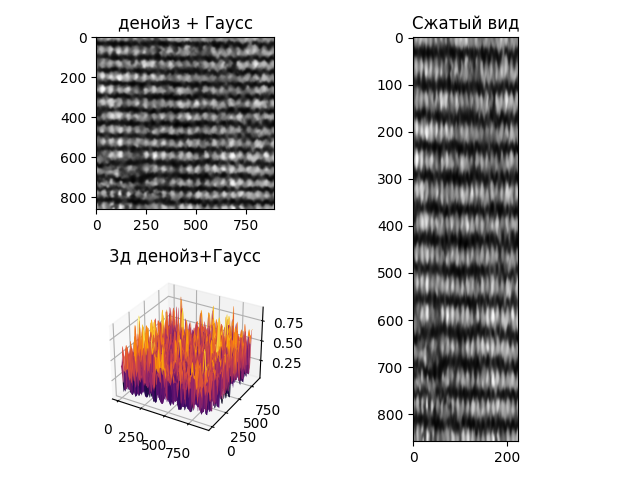

In [30]:
#######################
# ПОСТРОЕНИЕ ГРАФИКОВ #
#######################

fig = plt.figure()

ax=fig.add_subplot(221)
ax.imshow(denoisedGaussian, cmap='gray')
ax.set_title("денойз + Гаусс")

# ax=fig.add_subplot(212)
# ax.imshow(img, cmap='gray')
# ax.set_title("original")

ax=fig.add_subplot(223, projection='3d')
ax.plot_surface(x, y ,z, cmap ='inferno')
ax.set_title("3д денойз+Гаусс")

ax=fig.add_subplot(122)
ax.imshow(new, cmap='gray')
ax.set_title("Сжатый вид")

fig.tight_layout()
plt.show()